# **Transjakarta Operational Report**
---

### **BUSINESS PROBLEM UNDERSTANDING**

### **Context**

Transjakarta merupakan sistem transportasi terpadu yang mencakup Bus Rapid Transit (BRT), Non-BRT, Royal Trans, Mikrotrans, Bus Wisata, dan Transjabodetabek yang beroperasi di Jakarta dan sekitarnya. Layanan ini memiliki peran penting dalam mendukung mobilitas warga ibu kota Indonesia, dengan 260 halte yang tersebar di 13 koridor. Namun, PT Transjakarta menghadapi sejumlah tantangan yang harus diselesaikan untuk meningkatkan kualitas pengalaman perjalanan penumpang.

1. Semakin Padat, Jumlah penumpang TransJakarta Terus Meningkat.
Sumber: *https://mediaindonesia.com/megapolitan/587548/semakin-padat-jumlah-penumpang-transjakarta-terus-meningkat*

2. Miris Pelecehan Kembali Terjadi di Bus Transjakarta, Korban dan Penumpang Lain Bahu-membahu Tangkap Pelaku.
Sumber: *https://megapolitan.kompas.com/read/2023/02/22/07422841/miris-pelecehan-kembali-terjadi-di-bus-transjakarta-korban-dan-penumpang?page=all.*

Dalam menghadapi permasalahan tersebut, optimalisasi kinerja armada dan operasional trayek serta halte perjalanan menjadi kunci. Data lebih lanjut terkait kinerja dan operasional Transjakarta dapat diakses melalui sumber dataset yang disediakan di https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo.

Transjakarta, sebagai salah satu pilihan utama transportasi di Jakarta, terus memainkan peran penting dalam menyediakan pengalaman perjalanan yang nyaman, cepat, dan andal bagi penumpang. Dengan menyelesaikan tantangan yang ada, Transjakarta dapat memperkuat kontribusinya terhadap mobilitas perkotaan serta meningkatkan kesejahteraan masyarakat Jakarta.


### **Goals**

1. Memperoleh pemahaman terkait profil pengguna Transjakarta dengan fokus pada gender dan kelompok usia untuk merancang fasilitas yang lebih sesuai dengan kebutuhan mereka.
2. Mengidentifikasi pola perjalanan penumpang pada jam sibuk khususnya pada hari kerja, guna merancang dan mengoptimalkan fasilitas Transjakarta sesuai dengan kebutuhan pengguna.


Dari 2 hal yang disebutkan, diharapkan bisa membantu Stakeholders terkait yaitu Divisi Operasional dan Manajemen Operasional. 

## **Data Understanding**
----------------------------

Hal pertama yang dilakukan sebelum mengolah dan menganalisi data adalah **pemahaman dari dataset itu sendiri**. Disini saya akan melihat dataset Transjakarta dan memahami semua informasi yang didapat dari dataset ini.

### **Import Library**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import folium
from IPython.display import HTML, display

### **Load Dataset**

In [4]:
df = pd.read_csv('Transjakarta.csv')

In [5]:
pd.options.display.max_columns=None

df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


### **Check Info**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [7]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


### **Check Unique**

In [8]:
pd.set_option('display.max_colwidth', 1)
listItem = []
for col in df.columns:
    unique_samples = df[col].unique()[:5]  
    listItem.append([col, df[col].nunique(), unique_samples])

tabel1 = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                           data=listItem)
tabel1

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah]"
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982]"
6,corridorID,221,"[5, 6C, R1A, 11D, 12]"
7,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet via Patra Kuningan, Pantai Maju - Kota, Pulo Gebang - Pulo Gadung 2 via PIK, Tanjung Priok - Pluit]"
8,direction,2,"[1.0, 0.0]"
9,tapInStops,2570,"[P00142, B01963P, B00499P, B05587P, P00239]"


Setelah kita melakukan pengecekan info dan unique data tersebut, kita bisa melihat bahwa:

Dataset ini berisi data Transjakarta di bulan **April 2023**. Setelah melihat dan memahami informasi dari dataset ini, saya menemukan informasi apa saja yang saya miliki terkait dari kolom yang ada, dataset ini memiliki 22 kolom yang berisikan informasi, antara lain:

| Kolom             | Deskripsi                                      |
|-------------------|------------------------------------------------|
| `transID`           | Unik ID transaksi setiap transaksi             |
| `payCardID`         | ID kartu yang digunakan pengguna sebagai alat bayar |
| `payCardBank`       | Jenis kartu yang digunakan pengguna Transjakarta |
| `payCardName`       | Nama pengguna yang tertanam dalam kartu       |
| `payCardSex`        | Jenis kelamin pengguna yang tertanam dalam kartu |
| `payCardBirthDate`  | Tahun lahir pengguna kartu                     |
| `corridorID`        | Kode jenis rute                                |
| `corridorName`      | Nama rute beserta start dan finish-nya         |
| `direction`         | Terdapat 0 dan 1 dimana 0 adalah arah pergi dan 1 arah balik rute |
| `tapInStops`        | ID halte pengguna tap masuk (Entrance)         |
| `tapInStopsName`    | Nama halte pengguna tap masuk                   |
| `tapInStopsLat`     | Koordinat latitude halte pengguna tap masuk    |
| `tapInStopsLon`     | Koordinat longitude halte pengguna tap masuk   |
| `stopStartSeq`      | Menunjukkan pemberhentian keberapa berdasarkan direction |
| `tapInTime`         | Waktu pengguna tap masuk berupa tanggal dan jam |
| `tapOutStops`       | ID halte pengguna tap keluar (Exit)            |
| `tapOutStopsName`   | Nama halte pengguna tap keluar                  |
| `tapOutStopsLat`    | Koordinat latitude halte pengguna tap keluar   |
| `tapOutStopsLon`    | Koordinat longitude halte pengguna tap keluar  |
| `stopEndSeq`        | Menunjukkan pemberhentian keberapa berdasarkan direction |
| `tapOutTime`        | Waktu pengguna tap keluar berupa tanggal dan jam |
| `payAmount`         | Harga yang dibayar oleh pengguna               |

## **Data Cleaning**
--------------------------

Hal yang perlu dilakukan berikutnya adalah **Data Cleaning**. Proses ini bertujuan untuk menghandle data yang memiliki **duplikasi, missing value, ataupun anomali** demi efektifitas analisis data sebelum diproses.

### **Check Duplicate**

In [9]:
duplicates = df[df.duplicated()]

if not duplicates.empty:
    display(HTML('<span style="color: red; font-weight: bold;">Rows Duplicated:</span>'))
    print(duplicates)
else:
    display(HTML('<span style="color: green; font-weight: bold;">No duplicated rows found.</span>'))

Setelah melakukan pengecekan duplikat pada dateset Transjakarta, **tidak ditemukan** data yang duplikat.

### **Check Missing Values**

In [10]:
# Melihat jumlah nul pada tiap kolom
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStops          1213
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

Dalam dataset Transjakarta, terdapat 10 kolom yang memiliki missing value. Ada 5 kolom dengan jumlah missing value yang sama yaitu `tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime.`

In [11]:
missing_values = df.isnull().sum()

missing_percentage = round((df.isnull().sum() / len(df)) * 100, ndigits=2)

missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage}).sort_values(by='Percentage (%)', ascending=False)
missing_info[missing_info['Missing Values'] > 0]

,Missing Values,Percentage (%)
tapOutStops,2289,6.04
corridorName,1930,5.09
tapOutTime,1344,3.55
stopEndSeq,1344,3.55
tapOutStopsLon,1344,3.55
tapOutStopsLat,1344,3.55
tapOutStopsName,1344,3.55
corridorID,1257,3.32
tapInStops,1213,3.20
payAmount,1007,2.66


Dalam dataset Transjakarta, presentase missing value tertinggi terdapat pada kolom `tapOutStops`, sedangkan presentase missing value terendah terdapat pada kolom `payAmount`. Proporsi nilai yang hilang pada kolom `tapOutStops` mencapai **6.04%**, sementara pada kolom `payAmount` hanya sebesar **2.66%**.

### **Handle Missing Values**

Dalam dataset ini, digunakan dua metode untuk menangani missing value:

1. Mengisi data yang hilang: Pengisian missing value pada setiap kolom dilakukan dengan cara yang berbeda-beda, tergantung pada kesesuaian pengisian nilai yang paling mendekati dan rasional. Rincian pengisian nilai dapat dilihat pada bagian di bawah ini.

2. Menghapus baris sisanya yang memang tidak dapat diisi missing valuenya.

**1. Missing Value `payAmount`**

Missing value pada kolom `payAmount` sekitar 2,6%. Adapun untuk menghandle missing value tersebut diisi berdasarkan `corridorID`. Karena koridor perjalanan memiliki nilai `payAmount` yang konsisten. Pendekatan ini bertujuan untuk memanfaatkan pola konsistensi tersebut guna mengisi nilai yang kosong dengan lebih akurat.

In [12]:
payAmountbyCorridorID = pd.crosstab(df['corridorID'], df['payAmount'])
payAmountbyCorridorID

payAmount,0.0,3500.0,20000.0
corridorID,,,
1,0,236,0
10,0,101,0
10A,147,0,0
10B,139,0,0
10D,0,164,0
...,...,...,...
S21,0,388,0
S22,0,136,0
S31,0,0,151


Disini menggunakan crosstab untuk melihat data yang terdapat di kolom `corridorID`. Selanjutnya, akan diisi *missing value* di `payAmount` berdasarkan `corridorID`.

In [13]:
def fill_pay_amount(row):
    if row['corridorID'] in ['1K', '1T', '6P', 'B13', 'B14', 'D31', 'D32', 'S12', 'S31', 'T21']:
        return 20000
    elif row['corridorID'] in ['10A', '10B', '11B', '11C', '11K', '11M', '11N', '11P', '12C', '12F', '2E', '2F', '2H', '3A', '3B', '3C', '4E', '9F', 'BW9', 'JAK']:
        return 0
    else:
        return 3500

# Mengisi nilai
df['payAmount'] = df.apply(lambda row: fill_pay_amount(row) if pd.isna(row['payAmount']) else row['payAmount'], axis=1)

In [14]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStops          1213
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           0   
dtype: int64

Sekarang *missing value* di `payAmount` sudah tidak ada.

**2. Missing Value CorridorID**

Kita akan menggunakan operasi groupby dengan transform untuk membuat kolom baru yang berisi modus dari `'corridorID'` untuk setiap kelompok unik `'corridorName'`.

In [15]:
corridorIDmode= df.groupby('corridorName')['corridorID'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index()
corridorIDmode

,corridorName,corridorID
0,Andara - Stasiun Universitas Pancasila,JAK.44
1,BKN - Blok M,M7B
2,BSD - Jelambar,S11
3,BSD Serpong - Fatmawati,S12
4,Batusari - Grogol,8K
...,...,...
211,Terminal Rawamangun - Cipinang Muara,JAK.74
212,Terminal Tanah Merah - Pulo Gadung,JAK.112
213,Terminal Tanjung Priok - Ancol Barat,JAK.88
214,Tongtek - Tebet Eco Park (TEP) - Cililitan,JAK.43B


Pada tahap ini, kita mengonversi dua kolom dari DataFrame `'corridorIDmode'` menjadi kamus `'corridor_id_mapping'`. Dalam kamus ini,`'corridorName'` berfungsi sebagai kunci, dan nilai dari `'corridorID'` yang paling sering muncul menjadi nilainya. Hal ini dilakukan untuk menyelaraskan `'corridorName'` dari `'corridorID'` yang memiliki nilai kosong.

In [16]:
corridor_id_mapping = df.dropna(subset=['corridorID'])
corridor_id_mapping = corridor_id_mapping[['corridorName', 'corridorID']].drop_duplicates().set_index('corridorName')['corridorID']
corridor_id_mapping

corridorName
Matraman Baru - Ancol                       5     
Stasiun Tebet - Karet via Patra Kuningan    6C    
Pantai Maju - Kota                          R1A   
Pulo Gebang - Pulo Gadung 2 via PIK         11D   
Tanjung Priok - Pluit                       12    
                                            ..    
NaN                                         8A    
NaN                                         JAK.71
NaN                                         12F   
NaN                                         JAK.12
NaN                                         2Q    
Name: corridorID, Length: 424, dtype: object

Selanjutnya, kita akan menggantikan nilai yang hilang pada setiap baris dalam `'corridorID'` berdasarkan `'corridorName'` yang telah kita buat pada langkah sebelumnya. Jika penyesuaian nilai dari `'corridorID'` dengan `'corridorName'` tidak ditemukan (NaN), maka imputasi nilai dari `'corridorID'` akan dilewati ke baris berikutnya.

In [17]:
def fill_missing_corridor_id(row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['corridorName']):
        return corridor_id_mapping.get(row['corridorName'])
    return row['corridorID']

df['corridorID'] = df.apply(fill_missing_corridor_id, axis=1)

In [18]:
df['corridorID'].isnull().sum()

1125

Setelah melakukan imputasi nilai `'corridorID'`, masih tersisa 1125 nilai yang hilang. Kita dapat menghapus data ini karena tidak ada kolom lain yang dapat digunakan untuk pemetaan atau mengisi nilai kolom `'corridorID'` selain menggunakan informasi dari kolom `'corridorName'`.

**3. Missing Value CorridorName**

Kita akan menggunakan operasi groupby dengan transform untuk membuat kolom baru yang berisi mode dari `'corridorName'` untuk setiap kelompok unik `'corridorID'`.

In [19]:
corridorNamemode = df.groupby('corridorName')['corridorID'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index(name='corridorIDmode')
corridorNamemode

,corridorName,corridorIDmode
0,Andara - Stasiun Universitas Pancasila,JAK.44
1,BKN - Blok M,M7B
2,BSD - Jelambar,S11
3,BSD Serpong - Fatmawati,S12
4,Batusari - Grogol,8K
...,...,...
211,Terminal Rawamangun - Cipinang Muara,JAK.74
212,Terminal Tanah Merah - Pulo Gadung,JAK.112
213,Terminal Tanjung Priok - Ancol Barat,JAK.88
214,Tongtek - Tebet Eco Park (TEP) - Cililitan,JAK.43B


Pada tahap ini, kita mengonversi dua kolom dari DataFrame `'corridorNamemode'` menjadi kamus `'corridor_Name_mapping_reverse'`. Dalam kamus ini, `'corridorID'` berfungsi sebagai kunci, dan nilai dari `'corridorName'` yang paling sering muncul menjadi nilainya. Hal ini dilakukan untuk menyelaraskan `'corridorID'` dengan `'corridorName'` yang memiliki nilai kosong.

In [20]:
corridor_Name_mapping_reverse = corridor_id_mapping.reset_index().set_index('corridorID')['corridorName'].to_dict()
corridor_Name_mapping_reverse

{'5': nan,
 '6C': nan,
 'R1A': nan,
 '11D': nan,
 '12': nan,
 '1T': nan,
 'JAK.18': 'Kalibata - Kuningan',
 'B14': nan,
 '1Q': nan,
 '5M': nan,
 'M7B': nan,
 '9A': nan,
 '4': nan,
 'JAK.46': nan,
 'S22': nan,
 '13': nan,
 '9E': nan,
 'M9': nan,
 'JAK.88': nan,
 'T11': nan,
 'JAK.16': nan,
 '6V': nan,
 '11Q': nan,
 'JAK.02': nan,
 '11': 'Pulo Gebang - Matraman',
 '1C': nan,
 '3B': nan,
 'M1': nan,
 '7E': nan,
 '1P': nan,
 '7D': nan,
 '6H': nan,
 '14': nan,
 'BW9': nan,
 'JIS3': nan,
 '2': 'Pulo Gadung - Monas',
 'JAK.15': nan,
 '6N': nan,
 'M11': nan,
 'JAK.112': nan,
 '9N': nan,
 'JAK.43B': nan,
 'JAK.42': nan,
 '7P': nan,
 'JAK.36': nan,
 '13B': nan,
 'JAK.06': nan,
 'JAK.14': nan,
 'M7': nan,
 'T21': 'Palem Semi - Bundaran Senayan',
 '12A': 'Pelabuhan Kaliadem - Kota',
 '9D': nan,
 '1': nan,
 '3A': nan,
 '3C': nan,
 'M8': nan,
 'B21': nan,
 'JAK.71': nan,
 'JAK.77': nan,
 'M3': 'Kalideres - Bundaran HI via Veteran',
 'JAK.44': nan,
 'JAK.48B': nan,
 '8K': nan,
 'JAK.19': nan,
 'M10':

Selanjutnya, kita akan menggantikan nilai yang hilang pada setiap baris dalam `'corridorName'` berdasarkan `'corridorID'` yang telah kita buat pada langkah sebelumnya. Jika penyesuaian nilai dari `'corridorName'` dengan `'corridorID'` tidak ditemukan (NaN), maka imputasi nilai dari `'corridorName'` akan dilewati ke baris berikutnya.

In [21]:
def fill_missing_corridor_name(row):
    if pd.isnull(row['corridorName']) and pd.notnull(row['corridorID']):
        return corridor_Name_mapping_reverse.get(row['corridorID'])
    return row['corridorName']

df['corridorName'] = df.apply(fill_missing_corridor_name, axis=1)

In [22]:
df['corridorName'].isnull().sum()

1896

Setelah melakukan imputasi nilai `'corridorName'`, masih tersisa 1125 nilai yang hilang. Kita dapat menghapus data ini karena tidak ada kolom lain yang dapat digunakan untuk pemetaan atau mengisi nilai kolom `'corridorName'` selain menggunakan informasi dari kolom `'corridorID'`.

**4. Missing Value tapInStops**

Kita akan menggunakan groupby dengan kombinasi transform untuk membuat kolom baru yang berisi mode dari `tapInStops` berdasarkan setiap uniknya `tapInStopsName`.

In [23]:
tapInStops_mode = df.groupby('tapInStopsName')['tapInStops'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index()
tapInStops_mode

,tapInStopsName,tapInStops
0,18 Office Park,B00001P
1,ACC Simatupang,B00004P
2,ACE Hardware,B00005P
3,AKR Tower,B00018P
4,ASEAN,P00004
...,...,...
2597,Yayasan Nurul Ihsan Pulo Gebang,B05926P
2598,Yayasan Perguruan Rakyat 2,B05929P
2599,Yon Arhanud - 10 Pesanggrahan,B05933P
2600,Yos Sudarso Kodamar,P00274


Pada tahap ini, kita mengonversi dua kolom dari DataFrame `tapInStops_mode` menjadi kamus `tapInStops_mapping`. Dalam kamus ini, `tapInStopsName` berfungsi sebagai kunci, dan nilai dari `tapInStops` yang paling sering muncul menjadi nilainya. Hal ini dilakukan untuk menyelaraskan `tapInStops` yang memiliki nilai kosong dengan `tapInStopsName`.

In [24]:
tapInStops_mapping = df.dropna(subset=['tapInStops', 'tapInStopsName']).set_index('tapInStopsName')['tapInStops'].to_dict()
tapInStops_mapping

{'Pal Putih': 'P00142',
 'Kemenkes 2': 'B01963P',
 'Gg. Kunir II': 'B00499P',
 'Taman Elok 1': 'B05587P',
 'Sunter Boulevard Barat': 'P00239',
 'Benhil 3': 'B00127P',
 'Cervino Village': 'B00243P',
 'SDN Pondok Labu 11': 'B03416P',
 'Imperium': 'B00795P',
 'TPU Bungur': 'B05781P',
 'Pegangsaan Timur': 'B05433P',
 'Tendean': 'P00254',
 'Slipi Petamburan Arah Selatan': 'P00281',
 'Pasar Rumput': 'P00159',
 'Gelanggang Remaja Pasar Minggu': 'B00608P',
 'SMK Darussalam': 'B05291P',
 'JORR': 'P00096',
 'Apartemen Simprug Teras': 'B00058P',
 'Jembatan Tiga Arah Utara': 'P00093',
 'Gunung Sahari Mangga Dua Timur': 'B00722P',
 'RS Harapan Kita Arah Utara': 'P00206',
 'Tirtayasa': 'P00259',
 'Masjid Jami At Taqwa 2': 'B02335P',
 'Simpang Pahlawan Revolusi 1': 'B05023P',
 'St. Jatinegara 2': 'P00233',
 'Univ. Moestopo Bintaro': 'B05833P',
 'Jln. Kayu Besar Dalam': 'B06299P',
 'Pantai Maju': 'B06040P',
 'Polda Metro Jaya': 'P00183',
 '18 Office Park': 'B00001P',
 'Phe Tower Kebagusan': 'B02831P',

Selanjutnya, kita akan menggantikan nilai yang hilang pada setiap baris dalam `tapStoInps` berdasarkan `tapInStopsName` yang telah kita buat pada langkah sebelumnya. Jika penyesuaian nilai dari `tapInStops` dengan `tapInStopsName` tidak ditemukan (NaN), maka proses imputasi nilai `tapInStops` akan dilanjutkan ke baris berikutnya.

In [25]:
df['tapInStops'] = df['tapInStops'].fillna(df['tapInStopsName'].map(tapInStops_mapping))

In [26]:
df['tapInStops'].isnull().sum()

34

Setelah melakukan imputasi nilai `tapInStops`, masih tersisa 34 nilai yang hilang. Kita dapat menghapus data ini karena tidak ada kolom lain yang dapat digunakan untuk pemetaan atau mengisi nilai kolom `tapInStops` selain menggunakan informasi dari kolom `tapInStopsName`.


**5. Missing Value tapOutStops**

Kita akan menggunakan groupby dengan kombinasi transform untuk membuat kolom baru yang berisi mode dari `tapOutStops` berdasarkan setiap uniknya `tapOutStopsName`.

In [27]:
tapOutStops_mode = df.groupby('tapOutStopsName')['tapOutStops'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index()
tapOutStops_mode

,tapOutStopsName,tapOutStops
0,ABA,B00002P
1,ACC Simatupang,B00004P
2,ACE Hardware,B00005P
3,ASEAN,P00004
4,ASMI,P00005
...,...,...
2243,Yayasan Perguruan Rakyat 2,B05929P
2244,Yon Arhanud - 10 Pesanggrahan,B05933P
2245,Yos Sudarso Kodamar,P00274
2246,Yos Sudarso Kodamar 1,B05934P


Pada tahap ini, kita mengonversi dua kolom dari DataFrame `tapOutStops_mode` menjadi kamus `tapOutStops_mapping`. Dalam kamus ini, `tapOutStopsName` berfungsi sebagai kunci, dan nilai dari `tapOutStops` yang paling sering muncul menjadi nilainya. Hal ini dilakukan untuk menyelaraskan `tapOutStops` yang memiliki nilai kosong dengan `tapOutStopsName`.

In [28]:
tapOutStops_mapping = df.dropna(subset=['tapOutStops', 'tapOutStopsName']).set_index('tapOutStopsName')['tapOutStops'].to_dict()
tapOutStops_mapping

{'Tegalan': 'P00253',
 'Sampoerna Strategic': 'B03307P',
 'Simpang Kunir Kemukus': 'B04962P',
 'Raya Penggilingan': 'B03090P',
 'Kali Besar Barat': 'P00098',
 'Grand Sahid': 'B00694P',
 'Jln. Baros': 'B00899P',
 'Kayuringin 2': 'B01853P',
 'Blok M Jalur 3': 'B06578P',
 'Matraman 4': 'B02387P',
 'Mampang Prapatan': 'P00129',
 'Semanggi': 'P00216',
 'Matraman 2': 'P00135',
 'Jln. Gabus Raya': 'B01062P',
 'Pusdiklat Kemenag 1': 'B03032P',
 'Adam Malik': 'P00001',
 'Pasar Kebayoran Lama': 'P00155',
 'Pancoran Tugu Arah Barat': 'P00145',
 'Jln. Ancol Barat 6': 'B05989P',
 'Term. Poris Plawad': 'B05720P',
 'Jln. Mesjid Al Mabruk': 'B01393P',
 'Masjid Agung': 'P00133',
 'SMAN 100': 'B05256P',
 'RS Duren Sawit 2': 'B03135P',
 'Jatinegara RS Premier': 'P00086',
 'Bintaro Park VIew': 'B00147P',
 'Mall Taman Palem 3': 'B02195P',
 'SD Diakonia 1': 'B03322P',
 'Karet Sudirman': 'P00104',
 'Plaza Oleos': 'B02868P',
 'Bundaran Senayan 1': 'B00221P',
 'Kuningan Timur': 'P00121',
 'Sbr. Jembatan Sukamu

Selanjutnya, kita akan menggantikan nilai yang hilang pada setiap baris dalam `tapOutStops` berdasarkan `tapOutStopsName` yang telah kita buat pada langkah sebelumnya. Jika penyesuaian nilai dari `tapOutStops` dengan `tapOutStopsName` tidak ditemukan (NaN), maka proses imputasi nilai `tapOutStops` akan dilanjutkan ke baris berikutnya.

In [29]:
df['tapOutStops'] = df['tapOutStops'].fillna(df['tapOutStopsName'].map(tapOutStops_mapping))

In [30]:
df['tapOutStops'].isnull().sum()

1363

Setelah melakukan imputasi nilai `tapOutStops`, masih tersisa 1363 nilai yang hilang. Kita dapat menghapus data ini karena tidak ada kolom lain yang dapat digunakan untuk pemetaan atau mengisi nilai kolom `tapOutStops` selain menggunakan informasi dari kolom `tapOutStopsName`.

**6. Missing Value stopEndSeq**

Kita akan menggunakan groupby dengan kombinasi transform untuk membuat kolom baru yang berisi mode dari `stopEndSeq` berdasarkan setiap uniknya `stopStartSeq`.

In [31]:
stopEndSeq_mode = df.groupby('stopStartSeq')['stopEndSeq'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index()
stopEndSeq_mode

,stopStartSeq,stopEndSeq
0,0,1.0
1,1,2.0
2,2,3.0
3,3,5.0
4,4,6.0
...,...,...
62,63,66.0
63,64,66.0
64,65,73.0
65,66,68.0


Pada tahap ini, kita mengonversi dua kolom dari DataFrame `stopEndSeq_mode` menjadi kamus `stopEndSeq_mapping_df`. Dalam kamus ini, `stopEndSeq_mapping_df` berfungsi sebagai kunci, dan nilai dari `stopEndSeq` yang paling sering muncul menjadi nilainya. Hal ini dilakukan untuk menyelaraskan `stopEndSeq` yang memiliki nilai kosong dengan `stopStartSeq`.

In [32]:
stopEndSeq_mapping_df = df.dropna(subset=['stopStartSeq', 'stopEndSeq']).drop_duplicates(subset=['stopStartSeq']).set_index(['stopStartSeq'])['stopEndSeq']
stopEndSeq_mapping_df

stopStartSeq
7     12.0
13    21.0
38    39.0
23    29.0
5     15.0
      ... 
66    68.0
55    58.0
59    62.0
53    54.0
68    69.0
Name: stopEndSeq, Length: 67, dtype: float64

Selanjutnya, kita akan menggantikan nilai yang hilang pada setiap baris dalam `stopEndSeq` berdasarkan `stopStartSeq` yang telah kita buat pada langkah sebelumnya. Jika penyesuaian nilai dari `stopEndSeq` dengan `stopStartSeq` tidak ditemukan (NaN), maka proses imputasi nilai `stopEndSeq` akan dilanjutkan ke baris berikutnya.

In [33]:
df['stopEndSeq'] = df.apply(lambda row: stopEndSeq_mapping_df.get(row['stopStartSeq'], row['stopEndSeq']), axis=1)

In [34]:
df['stopEndSeq'].isnull().sum()

0

Setelah melakukan imputasi pada kolom `stopStartSeq`, nilai yang sebelumnya hilang pada kolom `stopEndSeq` berhasil dihapus.

In [35]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1125
corridorName        1896
direction           0   
tapInStops          34  
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          0   
tapOutTime          1344
payAmount           0   
dtype: int64

Setelah mengisi missing value, ternyata masih terdapat beberapa sisa nilai yang hilang. Missing value yang tidak terisi ini disebabkan karena kolom tidak memenuhi syarat aturan, yaitu hanya dapat dilakukan pengisian dengan metode pemetaan apabila kolom yang dijadikan acuan tidak memiliki nilai yang kosong. Oleh karena itu, baris dengan nilai yang kosong selanjutnya akan dihapus.

In [36]:
df = df.dropna(subset=['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon','tapOutTime'])

In [37]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

**Dataset sudah tidak memiliki missing value**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34686 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           34686 non-null  object 
 1   payCardID         34686 non-null  int64  
 2   payCardBank       34686 non-null  object 
 3   payCardName       34686 non-null  object 
 4   payCardSex        34686 non-null  object 
 5   payCardBirthDate  34686 non-null  int64  
 6   corridorID        34686 non-null  object 
 7   corridorName      34686 non-null  object 
 8   direction         34686 non-null  float64
 9   tapInStops        34686 non-null  object 
 10  tapInStopsName    34686 non-null  object 
 11  tapInStopsLat     34686 non-null  float64
 12  tapInStopsLon     34686 non-null  float64
 13  stopStartSeq      34686 non-null  int64  
 14  tapInTime         34686 non-null  object 
 15  tapOutStops       34686 non-null  object 
 16  tapOutStopsName   34686 non-null  object 
 17

Sebelum di bersihkan, kita memiliki 37.900 baris data, sekarang kita memiliki 34.686 baris.

### **Add New Column**

**1. Hour**

In [39]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour

**2. Trip Duration**

In [40]:
# Membuat kolom Trip Duration (dalam jam)
df['tripDuration'] = df['tapOutHour'] - df['tapInHour']
df['tripDuration'] = df['tripDuration'].apply(lambda x: 'Under 1 Hour' if x == 0 else x)

In [41]:
df['tripDuration'].value_counts()

tripDuration
1               20083
2               10748
Under 1 Hour    3806 
3               48   
-21             1    
Name: count, dtype: int64

Disini ditemukan anomali dimana ada nilai bernilai -21, selanjutnya akan dicari tahu di baris mana yang terdapat anomali itu.

In [42]:
df[df['tripDuration'] == -21]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tripDuration
37615,JEES739W6T40LL,3563362178943707,dki,drg. Michelle Puspita,F,1968,2E,Rusun Rawa Bebek - Kodamar,0.0,B00554P,Gg. Sawo 1,-6.20176,106.93513,11,2023-04-24 21:46:56,B01850P,Kayu Mas,-6.17911,106.90255,13.0,2023-04-25 00:30:08,0.0,21,0,-21


Ternya anomali itu terdapat di index baris 37615. Nilai -21 itu karena pengguna tersebut melakukan tap in di jam 21.00 dan dan tap out di pukul 00.00. Karena cara yang dilakukan untuk membuat `tripDuration` jam tap out dikurang tap in, maka dilakukan sedikit perubahan.

In [43]:
# Mengatasi tripDuration yang isinya -21 dan seharusnya berisi 3
df['tripDuration'] = df.apply(lambda row: row['tripDuration'] + 24 if row['tripDuration'] == -21 else row['tripDuration'], axis=1)
df['tripDuration'].value_counts()

tripDuration
1               20083
2               10748
Under 1 Hour    3806 
3               49   
Name: count, dtype: int64

Nilai -21 tadi kini sudah berubah menjadi 3.

**3. Day**

In [44]:
df['tapInDay'] = df['tapInTime'].dt.dayofweek
tapInDay = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['tapInDay'] = df['tapInDay'].map(tapInDay)

**4. Week**

In [45]:
df["tapInWeek"] =df['tapOutTime'].dt.strftime('%d')

**5. Age**

Untuk mencari distribusi penumpang berdasarkan kategori usia.


In [46]:
df['age'] = 2023 - df['payCardBirthDate']

def categorize_age(age):
    if age < 18:
        return 'Under 18'
    elif 18 <= age <= 22:
        return '18-22'
    elif 23 <= age <= 30:
        return '23-30'
    elif 31 <= age <= 40:
        return '31-40'
    elif 41 <= age <= 50:
        return '41-50'
    elif 51 <= age <= 60:
        return '51-60'
    else:
        return 'Elderly'

df['ageGroup'] = df['age'].apply(categorize_age)

**6. Transtype**

Untuk melihat jenis kendaraan yang digunakan oleh penumpang berdasarkan dataset Transjakarta.

In [47]:
df['payAmount'] = df['payAmount'].astype('int64')

In [48]:
def determine_trans_type(payAmount):
    if payAmount == 20000:
        return 'Royal Trans'
    elif payAmount == 3500:
        return 'Regular Tj'
    else:
        return 'JakLingko'

df['transType'] = df['payAmount'].apply(determine_trans_type)

df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tripDuration,tapInDay,tapInWeek,age,ageGroup,transType
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,5,6,1,Monday,03,15,Under 18,Regular Tj
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,5,6,1,Monday,03,26,23-30,Regular Tj
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,5,6,1,Monday,03,31,31-40,Regular Tj
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,5,6,1,Monday,03,45,41-50,Regular Tj
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,6,6,Under 1 Hour,Monday,03,41,41-50,Regular Tj
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,12.0,2023-04-21 19:55:49,3500,18,19,1,Friday,21,19,18-22,Regular Tj
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,16.0,2023-04-18 22:28:22,3500,21,22,1,Tuesday,18,49,41-50,Regular Tj
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000,10,13,3,Tuesday,04,47,41-50,Royal Trans
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,40.0,2023-04-15 20:27:50,0,19,20,1,Saturday,15,47,41-50,JakLingko


**7. Trip Category**

Untuk melihat jenis perjalanan yang digunakan oleh penumpang berdasarkan waktu perjalanan mereka.

In [49]:
def categorize_trip_duration(trip_duration):
    if trip_duration == 'Under 1 Hour':
        return 'Very Short Trip'
    elif trip_duration == 1:
        return 'Short Trip'
    elif trip_duration == 2:
        return 'Medium Trip'
    else:
        return 'Long Trip'

df['tripCategory'] = df['tripDuration'].apply(categorize_trip_duration)
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tripDuration,tapInDay,tapInWeek,age,ageGroup,transType,tripCategory
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,5,6,1,Monday,03,15,Under 18,Regular Tj,Short Trip
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,5,6,1,Monday,03,26,23-30,Regular Tj,Short Trip
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,5,6,1,Monday,03,31,31-40,Regular Tj,Short Trip
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,5,6,1,Monday,03,45,41-50,Regular Tj,Short Trip
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,6,6,Under 1 Hour,Monday,03,41,41-50,Regular Tj,Very Short Trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,12.0,2023-04-21 19:55:49,3500,18,19,1,Friday,21,19,18-22,Regular Tj,Short Trip
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,16.0,2023-04-18 22:28:22,3500,21,22,1,Tuesday,18,49,41-50,Regular Tj,Short Trip
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000,10,13,3,Tuesday,04,47,41-50,Royal Trans,Long Trip
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,40.0,2023-04-15 20:27:50,0,19,20,1,Saturday,15,47,41-50,JakLingko,Short Trip


In [50]:
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount', 'tapInHour', 'tapOutHour', 'tripDuration', 'tapInDay',
       'tapInWeek', 'age', 'ageGroup', 'transType', 'tripCategory'],
      dtype='object')

In [51]:
from scipy.stats import kstest

columns = ['payCardBirthDate','stopStartSeq','stopEndSeq','payAmount','tapInHour','tapOutHour','age']

list = []

for i in columns : 
    ks,pvalue = kstest((df[i]), 'norm')
    if pvalue> 0.05:
        list.append([i,round(pvalue,2), ' berdistribusi normal'])
    else :
        list.append([i,round(pvalue,2), 'berdistribusi tidak normal'])

print('Jika p-value < 0,05 maka data berdistribusi tidak normal')
print('Jika p-value > 0,05 maka data berdistribusi normal')
print(f'\n')
print('Hasil Uji Normalitas')
pd.DataFrame(list, columns =[['Nama kolom','p-value','Distribusi']])

Jika p-value < 0,05 maka data berdistribusi tidak normal
Jika p-value > 0,05 maka data berdistribusi normal


Hasil Uji Normalitas


,Nama kolom,p-value,Distribusi
0,payCardBirthDate,0.0,berdistribusi tidak normal
1,stopStartSeq,0.0,berdistribusi tidak normal
2,stopEndSeq,0.0,berdistribusi tidak normal
3,payAmount,0.0,berdistribusi tidak normal
4,tapInHour,0.0,berdistribusi tidak normal
5,tapOutHour,0.0,berdistribusi tidak normal
6,age,0.0,berdistribusi tidak normal


Kolom yang dilihat yaitu kolom-kolom yang berisikan nilai numerikal. Berdasarkan temuan diatas yang diuji normalitas menggunakan Kolmogorov-Smirnov Test, disimpulkan bahwa seluruh data **terdistribusi tidak normal**.

## **Data Analysis**
----------------------

### **Profil Pengguna Transjakarta**

Tujuan menganalisis profil pengguna Transjakarta adalah untuk mendapatkan pemahaman mengenai karakteristik perilaku pengguna yang menggunakan layanan tersebut. Analisis tersebut dilakukan dengan fokus pada dua aspek utama: gender dan kelompok usia. 

`- Bagaimana proporsi pengguna Transjakarta berdasarkan gender?`

`- Bagaimana persebaran usia pengguna Transjakarta?`

**Proporsi pengguna Transjakarta berdasarkan gender**

In [52]:
count_gender = df['payCardSex'].value_counts().reset_index()
count_gender

,payCardSex,count
0,F,18482
1,M,16204


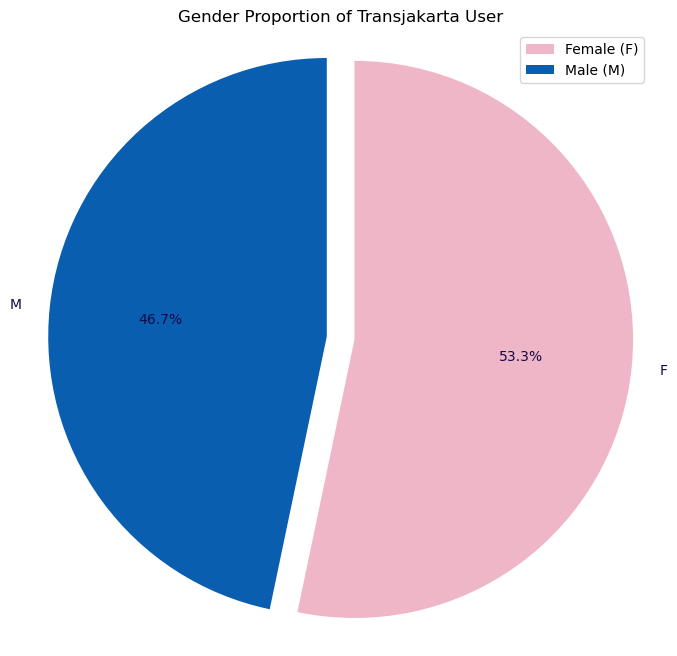

In [53]:
plt.figure(figsize=(8,8))
plt.pie(count_gender['count'],
        labels=count_gender['payCardSex'],
        autopct='%.1f%%',
        colors=['#EFB6C8','#0A5EB0'],
        startangle=90,
        counterclock=False,
        explode=[0.1,0],
        textprops={'color':'#170845'})
plt.axis('equal')
plt.legend(['Female (F)', 'Male (M)'], loc='upper right')
plt.title('Gender Proportion of Transjakarta User')
plt.show()

- Berdasarkan pie chart yang ditampilkan, terlihat distribusi proporsi penumpang Transjakarta berdasarkan gender. Data tersebut diperoleh dari kolom *'payCardSex'* dengan asumsi bahwa jenis kelamin pengguna sesuai dengan informasi yang tercatat pada kepemilikan kartu mereka.
- Hasil analisis menunjukkan bahwa proporsi penumpang wanita lebih tinggi sekitar 6,6% dibandingkan dengan penumpang pria. Meskipun perbedaannya tidak terlalu signifikan, kebijakan inklusif seperti penyediaan armada khusus wanita dinilai relevan. Kebijakan ini dirancang untuk memberikan rasa aman, khususnya dari risiko kejahatan seksual yang sering terjadi di area operasional Transjakarta. Oleh karena itu, data ini menjadi dasar bahwa penumpang wanita masih mendominasi, sehingga kebijakan penyediaan bus khusus wanita dianggap tepat sasaran dan efektif dalam memenuhi kebutuhan mereka.

### **Persebaran usia pengguna Transjakarta**

Selain menganalisis pengguna berdasarkan gender, persebaran usia pengguna Transjakarta juga menjadi hal yang perlu di analisis. Memahami persebaran usia penumpang membantu Transjakarta dalam merancang fasilitas dan layanan yang sesuai dengan karakteristik setiap kelompok usia. Misalnya, penyesuaian halte atau rute tunggu untuk memenuhi kebutuhan penumpang anak-anak atau lansia.

In [54]:
count_age = df['ageGroup'].value_counts().reset_index()
count_age

,ageGroup,count
0,31-40,10787
1,23-30,6232
2,41-50,5607
3,Under 18,4977
4,18-22,3723
5,51-60,2674
6,Elderly,686


**Visualisasi Bar Chart**

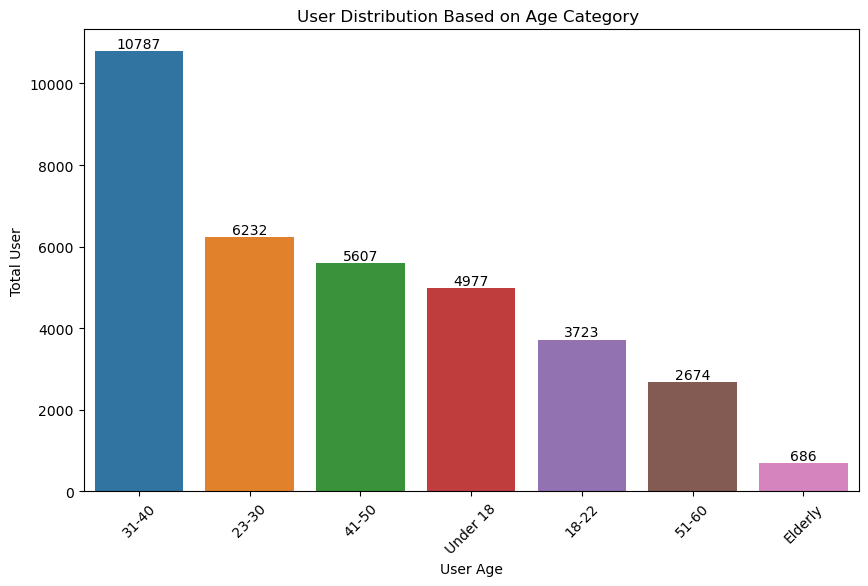

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(x='ageGroup', y='count', data=count_age, hue='ageGroup')

for i, v in enumerate(count_age['count']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.xlabel('User Age')
plt.ylabel('Total User')
plt.title('User Distribution Based on Age Category ')
plt.xticks(rotation=45)
plt.show()

**Visualisasi Histogram**

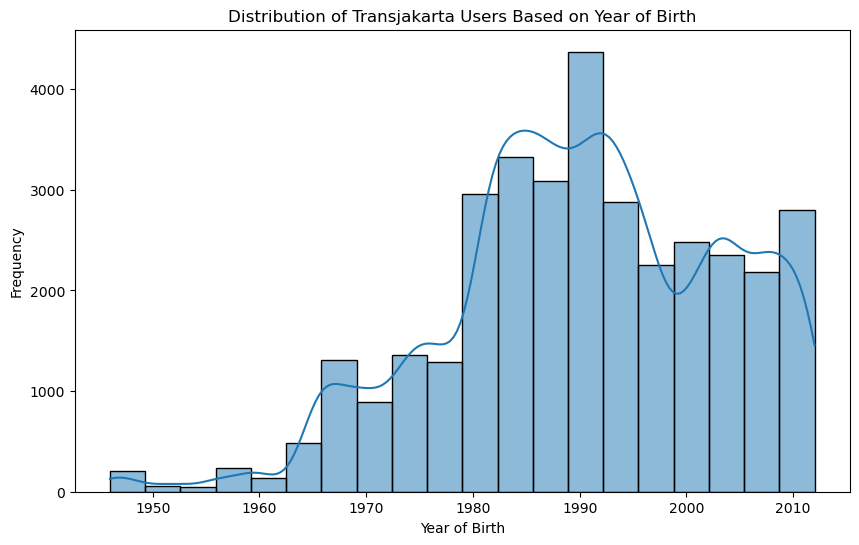

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(x='payCardBirthDate', data=df, bins=20, kde=True)

plt.title('Distribution of Transjakarta Users Based on Year of Birth')
plt.xlabel('Year of Birth') 
plt.ylabel('Frequency') 

plt.show()

- Dari bar chart di atas, terlihat bahwa jumlah penumpang Transjakarta paling banyak terdapat dalam rentang usia 31-40 tahun, diikuti oleh rentang usia 23-30 tahun, dan 41-50 tahun.

- Dari histogram di atas, dapat disimpulkan bahwa pengguna Transjakarta didominasi oleh penumpang dengan tahun kelahiran pada rentang tahun 1980-1990-an, menunjukkan bahwa mayoritas pengguna berada dalam kelompok usia 20-39 tahun.

- Dalam analisis ini, diasumsikan bahwa pengguna Tansjakarta adalah orang-orang yang sedang di tahap mencari nafkah/bekerja, sehingga bisa difokuskan pada kelompok populasi tersebut. Sebagai contoh, menambah armada khusus untuk orang-orang yang pergi dan pulang bekerja.

### **Koridor Dengan Pengguna Terbanyak**

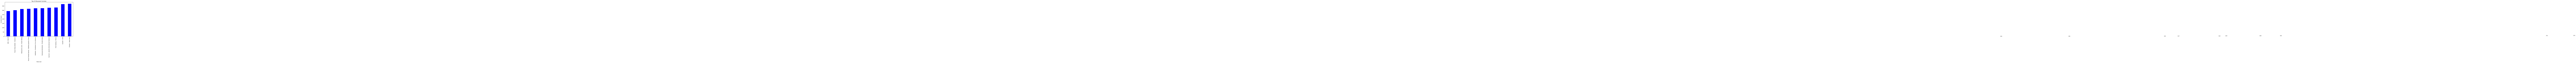

In [57]:
top_koridor = df['corridorName'].value_counts().head(10)
top_koridor = top_koridor.sort_values()

plt.figure(figsize=(12, 6))

ax = top_koridor.plot(kind='bar', color='blue')
plt.xlabel('Total User')
plt.ylabel('Corridor Name')
plt.title('Top 10 Bussiest Corridor')

for i, v in enumerate(top_koridor):
    ax.text(v + 1, i, str(v), va='center', fontsize=10, color='black')

plt.show()

In [58]:
female_df= df[df['payCardSex'] == 'F']

In [59]:
corridor_female_df = female_df['corridorName'].value_counts().reset_index()
corridor_female_df = corridor_female_df.sort_values(by='count', ascending=False).head(5)
corridor_female_df

,corridorName,count
0,Pasar Minggu - Tanah Abang,213
1,Poris Plawad - Bundaran Senayan,211
2,Rusun Rawa Bebek - Kodamar,205
3,Terminal Tanah Merah - Pulo Gadung,195
4,Cilangkap - Cililitan,187


C:\Users\Asus\AppData\Local\Temp\ipykernel_3728\2322284649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corridorName', y='count', data=corridor_female_df , palette='pastel')


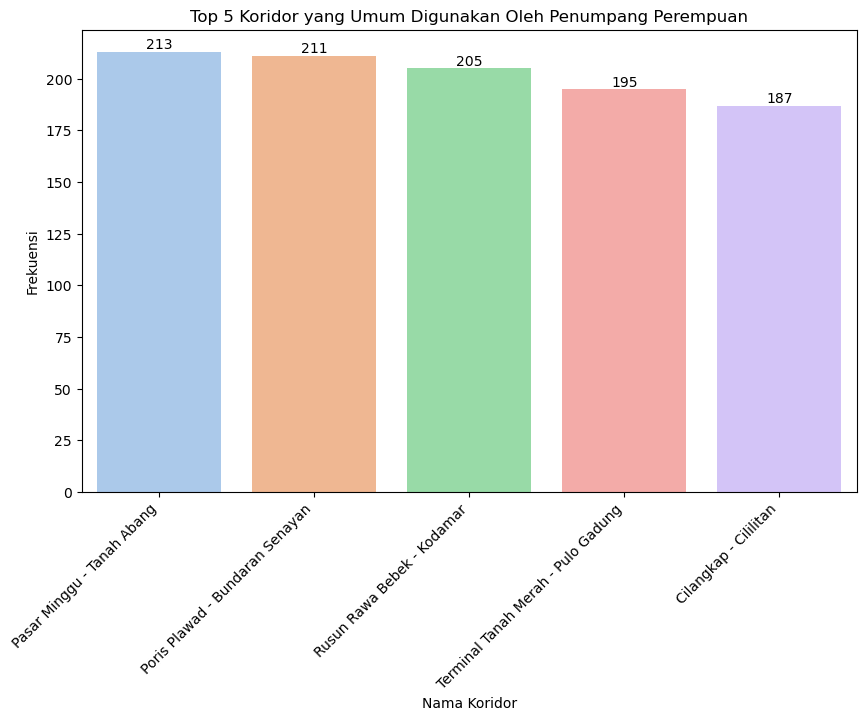

In [60]:

plt.figure(figsize=(10, 6))
sns.barplot(x='corridorName', y='count', data=corridor_female_df , palette='pastel')  

plt.xlabel('Nama Koridor')
plt.ylabel('Frekuensi')
plt.title('Top 5 Koridor yang Umum Digunakan Oleh Penumpang Perempuan')

for i, v in enumerate(corridor_female_df['count']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')


plt.xticks(rotation=45, ha='right')
plt.show()

- Berdasarkan barplot diatas, Cibubur - Balai Kota menunjukkan preferensi yang tinggi diikuti dengan koridor Ciputat-CSW, dan Pulo-Gadung-Monas. Informasi ini bisa menjadi panduan dalam pengembangan layanan atau fasilitas khusus untuk meningkatkan kenyamanan dan keamanan perjalanan pengguna Transjakarta. 

- Berdasarkan bar chart koridor yang sering digunakan oleh penumpang perempuan yaitu Koridor Pasar Minggu - Tanah Abang, Poris Plawad - Bundaran Senayan, Rusun Rawa Bebek - Kodamar, Terminal Tanah Merah - Pulo Gadung dan Cilangkap - Cililitan.

- Terdapat beberapa koridor yang menjadi favorit penumpang perempuan, namun belum dilengkapi dengan layanan bus khusus perempuan. Hal ini mengindikasikan perlunya peningkatan layanan dengan menyediakan fasilitas tersebut di koridor lain yang ramai digunakan. Informasi ini dapat dijadikan bahan pertimbangan untuk menentukan prioritas koridor yang membutuhkan perhatian lebih lanjut. Langkah ini sejalan dengan upaya menciptakan transportasi yang lebih inklusif dan mendukung keamanan serta kenyamanan perempuan.

### **Peak Hour**

Kali ini akan dibuat temuan untuk melihat di waktu apa perjalanan paling banyak dilakukan.

C:\Users\Asus\AppData\Local\Temp\ipykernel_3728\3438830956.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grouped_data['total_trip'].fillna(0, inplace=True)


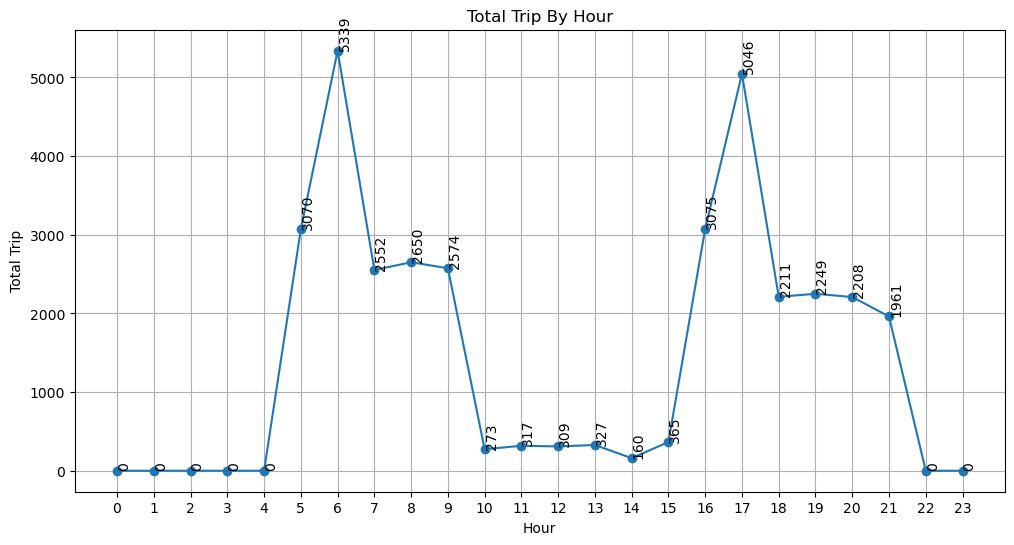

In [61]:
# Mengelompokkan data berdasarkan 'tapInHour' dan menghitung jumlah trip
grouped_data = df.groupby('tapInHour').size().reset_index(name='total_trip')

# Membuat DataFrame dengan semua jam dari 0 hingga 23
all_hours = pd.DataFrame({'tapInHour': range(24)})

# Gabungkan data yang ada dengan semua jam
grouped_data = all_hours.merge(grouped_data, on='tapInHour', how='left')
grouped_data['total_trip'].fillna(0, inplace=True)
grouped_data = grouped_data.sort_values(by='tapInHour')

# Membuat line chart
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['tapInHour'], grouped_data['total_trip'], marker='o', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Total Trip')
plt.title('Total Trip By Hour')
plt.xticks(range(24))
plt.grid()

for i, j in zip(grouped_data['tapInHour'], grouped_data['total_trip']):
    plt.text(i, j, str(int(j)), ha='left', va='bottom', rotation='vertical')

plt.show()

- Dari grafik lineplot diatas, peak hours atau puncak jam kesibukan terdapat di **jam 5 sampai jam 6** di pagi hari dan **jam 4 sampai jam 5** di sore hari.

- Dalam analisis ini, kembali diasumsikan bahwa pengguna Tansjakarta adalah orang-orang yang sedang di tahap mencari nafkah/bekerja, sehingga bisa difokuskan pada kelompok populasi tersebut. Dan dapat dijadikan acuan dalam optimalisasi dan efisiensi kinerja trayek dan armada yang lebih relevan.

### **Trip Per Category**

Disini ingin dilihat jenis lama perjalanan apa yang paling sering dilakukan oleh pengguna *Transjakarta*.

In [62]:
count_tripCat = df['tripCategory'].value_counts().reset_index()
count_tripCat

,tripCategory,count
0,Short Trip,20083
1,Medium Trip,10748
2,Very Short Trip,3806
3,Long Trip,49


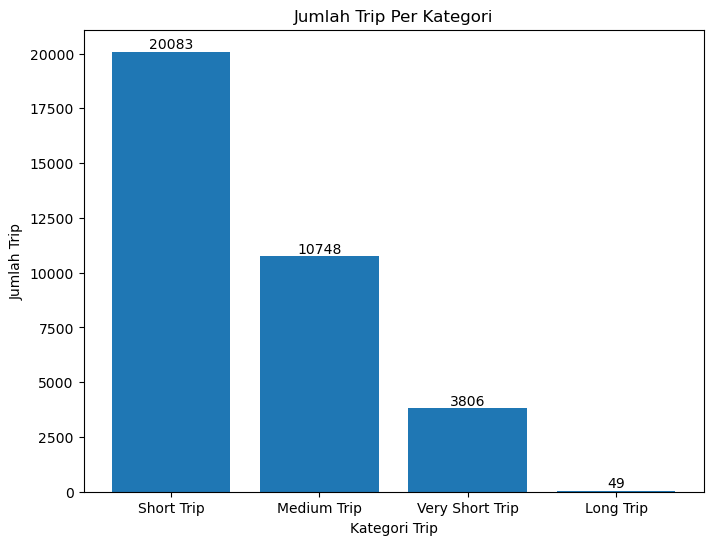

In [63]:
plt.figure(figsize=(8, 6))
plt.bar(count_tripCat['tripCategory'], count_tripCat['count'])

for i, v in enumerate(count_tripCat['count']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
    
plt.xlabel('Kategori Trip')
plt.ylabel('Jumlah Trip')
plt.title('Jumlah Trip Per Kategori')

plt.show()

Dari barchart di atas, jenis perjalanan yang paling sering dilakukan adalah Short trip, di mana perjalanan hanya berkisar 1-2 jam, yang bisa diasumsikan bahwa ini merupakan rata-rata perjalanan seseorang untuk pergi/pulang bekerja sehari-harinya

## **Conclusion**

Kesimpulan dari analisis terkait upaya meningkatkan kinerja armada dan operasional Transjakarta adalah sebagai berikut:

1. Profil Pengguna Transjakarta
- Proporsi penumpang wanita lebih banyak daripada penumpang pria walaupun tidak signifikan. Namun kebijakan inklusif armada khusus wanita perlu dikaji ulang mengenai urgensi untuk kenyamanan dan keamanan seluruh penumpang Transjakarta.

- Mayoritas pengguna Transjakarta adalah kategori usia 31-40 Tahun yang mana diasumsikan sebagai pekerja.

2. Koridor Dengan Pengguna Terbanyak
- Koridor tersibuk terdapat pada Cibubur-Balai Kota, diikuti dengan koridor Ciputat-CSW, dan Pulo Gadung-Monas. 

- Koridor yang paling sering digunakan oleh penumpang perempuan adalah koridor Pasar Minggu - Tanah Abang, diikuti dengan Poris Plawad - Bundaran Senayan, dan juga Rusun Rawa Bebek - Kodamar.

3. Peak Hour
- Puncak jam kesibukan terdapat di **jam 5 sampai jam 6** di pagi hari dan **jam 4 sampai jam 5** di sore hari.

4. Trip Per Category
- jenis perjalanan yang paling sering dilakukan adalah Short trip, di mana perjalanan hanya berkisar 1-2 jam, yang bisa diasumsikan bahwa ini merupakan rata-rata perjalanan seseorang untuk pergi/pulang bekerja sehari-harinya



## **Suggestion**

**1. Menyediakan Fasilitas Khusus Wanita**
Mengembangkan layanan bus khusus wanita di jalur-jalur yang sering digunakan oleh penumpang perempuan tetapi belum tersedia fasilitas bus khusus tersebut.

**2. Penyesuaian Jam Operasional**
 Penyesuaian jam operasional armada pada waktu sibuk bertujuan untuk mencegah kepadatan penumpang (overcrowding), sehingga menciptakan pengalaman perjalanan yang lebih aman dan nyaman bagi para pengguna.

**3. Optimalisasi Armada dan Fasilitas pada Koridor Sibuk**
- Menambah jumlah armada pada koridor yang memiliki tingkat kepadatan penumpang tinggi, seperti koridor Cibubur - Balai Kota dan Ciputat - CSW, guna mengatasi lonjakan penumpang pada jam sibuk.
- Langkah ini dapat dilakukan dengan mendistribusikan ulang bus dari koridor yang lebih sepi ke koridor yang lebih padat.
- Selain itu, memastikan ketersediaan armada yang memadai sesuai dengan jumlah penumpang pada jam-jam puncak menjadi prioritas utama.

Implementasi saran-saran ini diharapkan dapat membantu Transjakarta dalam meningkatkan kinerja operasional dan kepuasan pengguna layanan.

## **Save Cleaned Data**

In [64]:
# df.to_excel('Transjakarta_cleaned.xlsx')